In [15]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle

from math import sqrt
from os import listdir
from os.path import isfile, join

from scipy.misc import imresize

In [2]:
def getFiles(path):
    files = [f for f in listdir(path) if isfile(join(path, f))]
    train_files = None
    for f in files:
        img = imageio.imread(join(path, f))
        x, y, z = img.shape
        reshaped_img = img.reshape(x*y*z).T        
        if train_files is None:
            train_files = np.array([reshaped_img])
        else:
            train_files = np.append(train_files, [reshaped_img], axis = 0)
        
    return train_files


In [3]:
X = getFiles('fruits-360/Training/Apple Pink Lady')
Y = np.array(["Apple Pink Lady"])

for y in range(0,len(X)-1):
    Y = np.append(Y, ["Apple Pink Lady"], axis = 0)

banans = getFiles('fruits-360/Training/Banana')
X = np.concatenate((X, banans), axis=0)

for y in range(0,len(banans)):
    Y = np.append(Y, ["Banans"], axis = 0)

#apple_golden = getFiles('fruits-360/Training/Apple Golden 2')
#X.extend(apple_golden)

#for y in range(0,len(apple_golden)):
#    Y.append("Apple Golden 2")

#Y.reshape(Y.shape[0],)

X, Y = shuffle(X, Y, random_state=42)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True,random_state=42)

In [5]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(y_test, y_predicted)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_predicted))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
                 precision    recall  f1-score   support

Apple Pink Lady       1.00      1.00      1.00       101
         Banans       1.00      1.00      1.00        89

      micro avg       1.00      1.00      1.00       190
      macro avg       1.00      1.00      1.00       190
   weighted avg       1.00      1.00      1.00       190


Confusion matrix:
[[101   0]
 [  0  89]]


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
clf.predict(X_test[10].reshape(1, -1))

array(['Banans'], dtype='<U15')

In [7]:
restored = X_test[10].reshape(100, 100, 3)

In [8]:
print("Accuracy:", accuracy_score(y_test,y_predicted))

Accuracy: 1.0


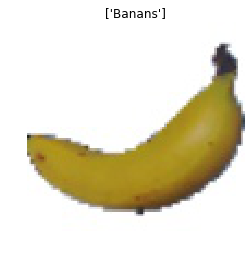

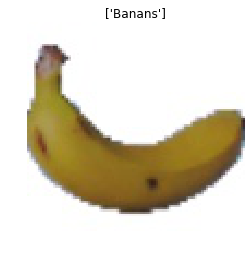

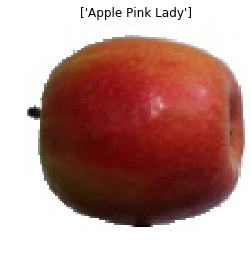

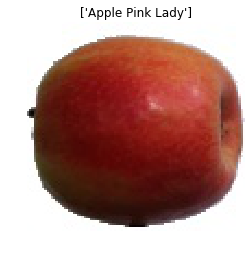

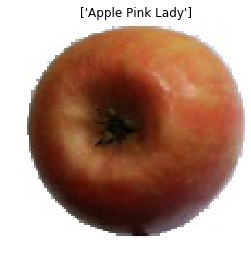

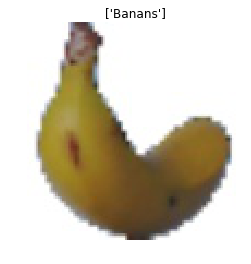

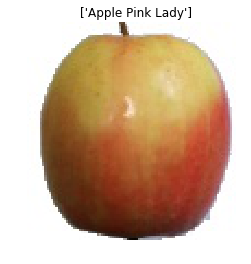

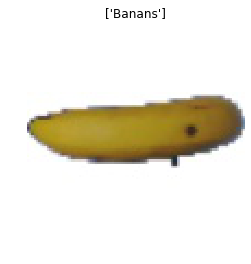

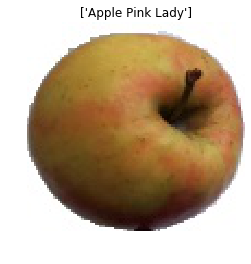

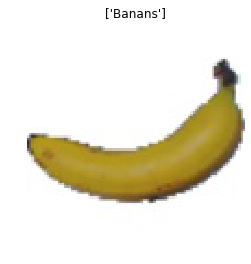

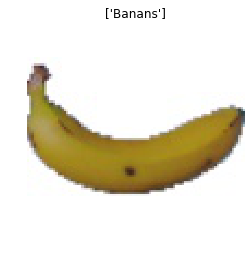

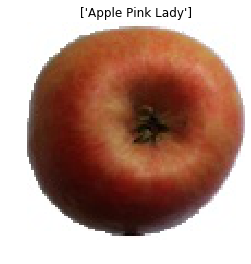

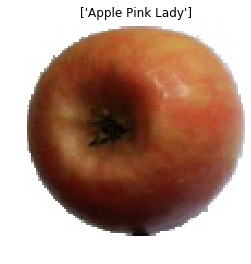

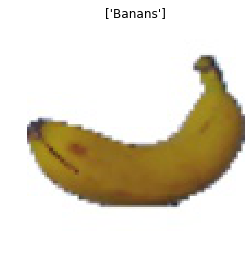

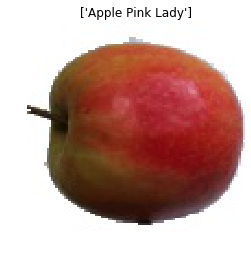

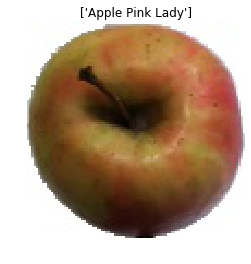

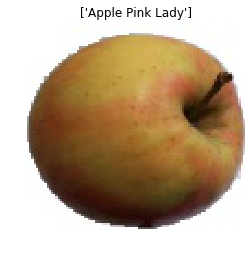

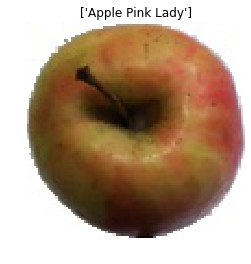

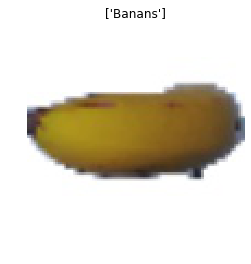

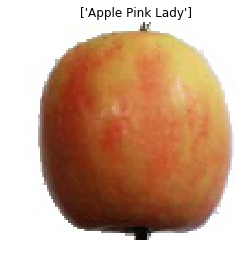

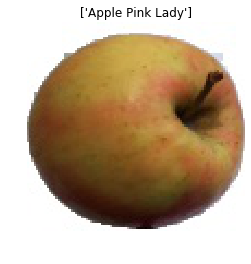

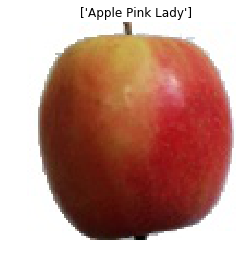

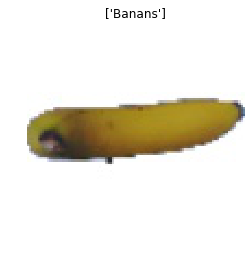

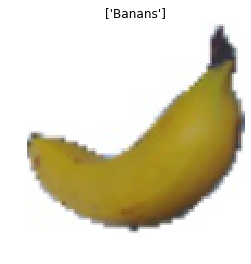

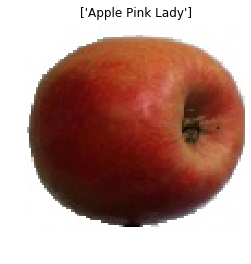

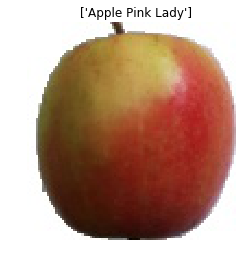

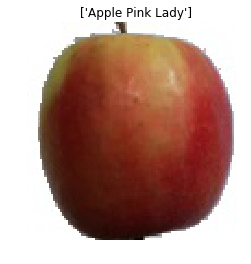

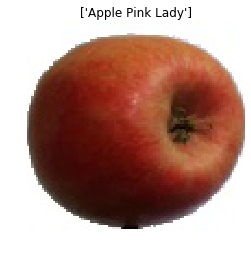

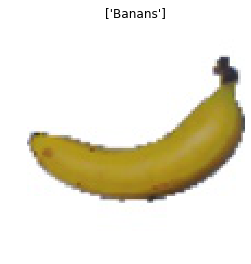

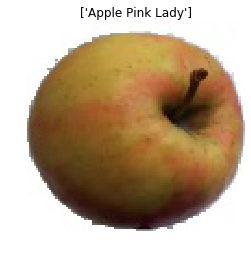

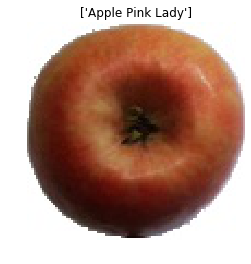

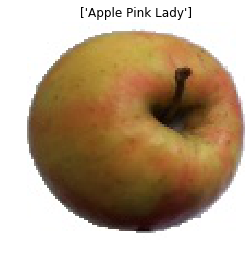

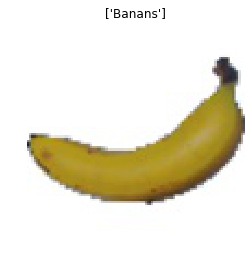

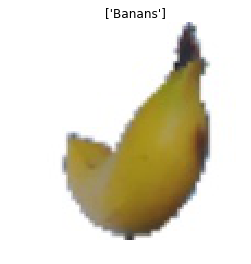

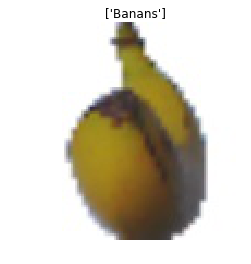

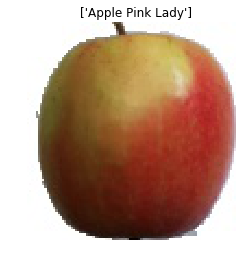

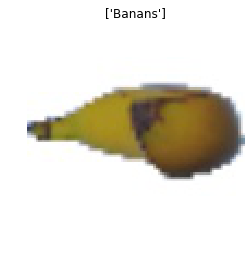

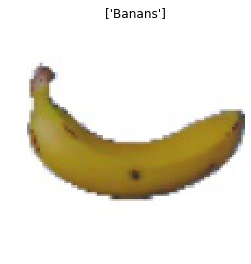

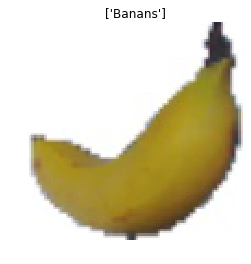

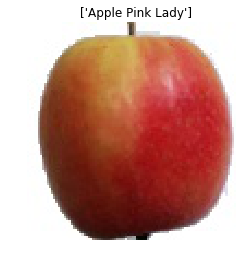

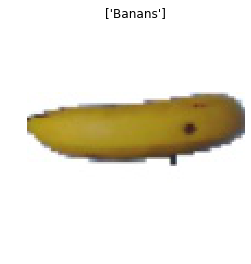

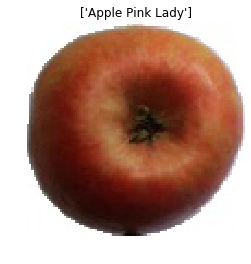

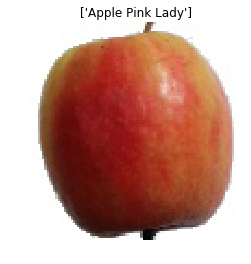

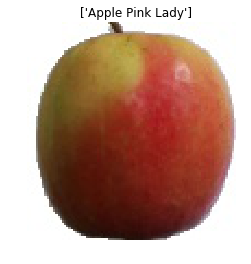

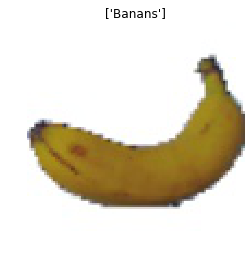

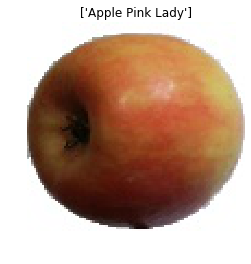

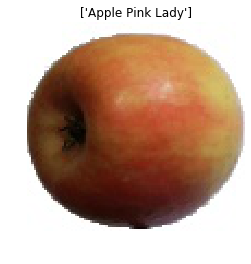

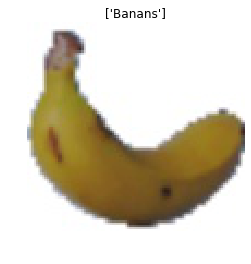

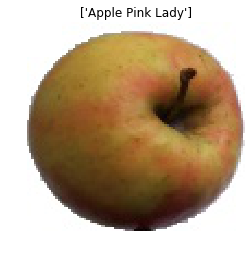

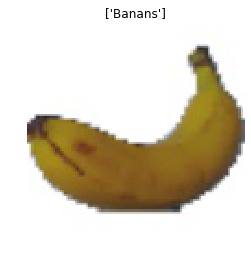

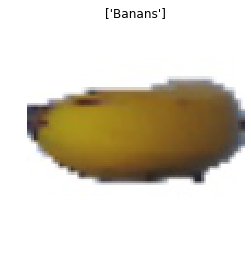

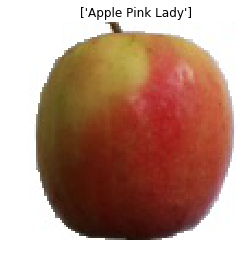

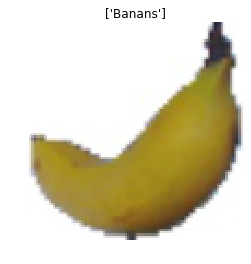

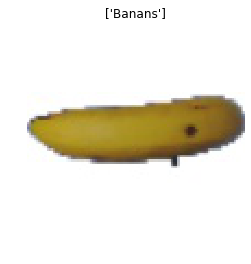

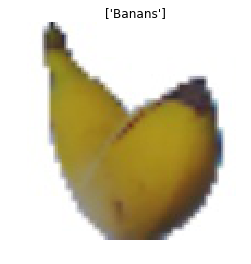

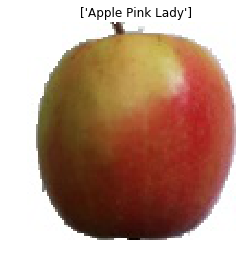

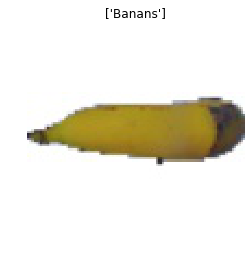

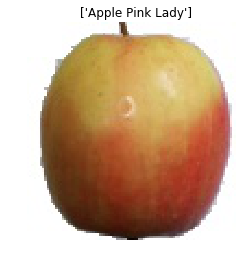

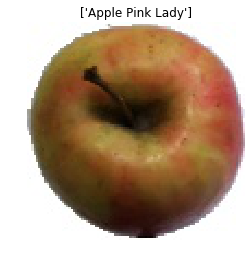

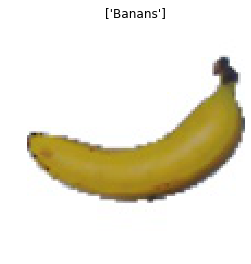

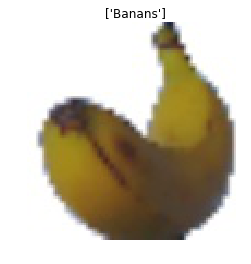

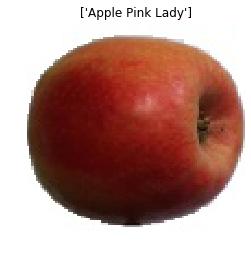

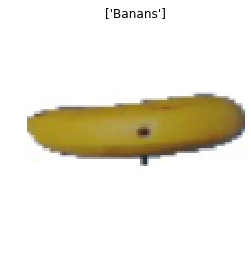

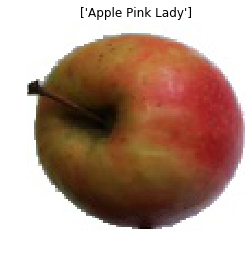

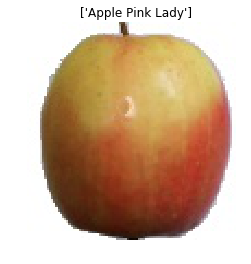

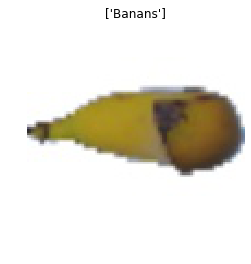

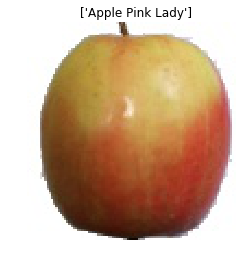

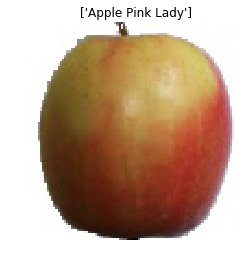

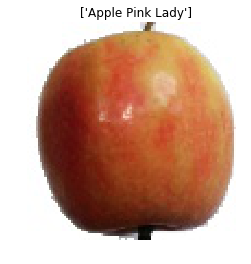

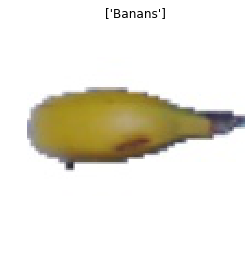

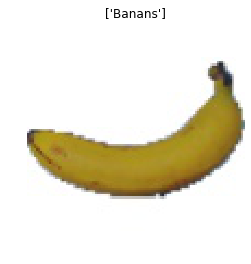

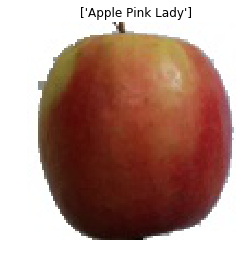

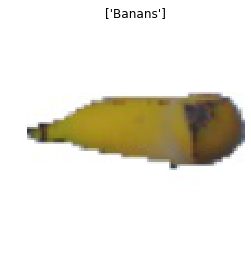

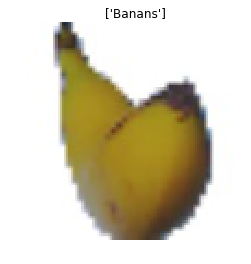

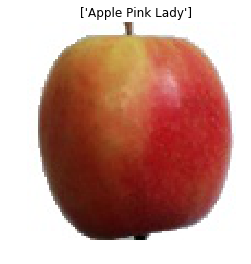

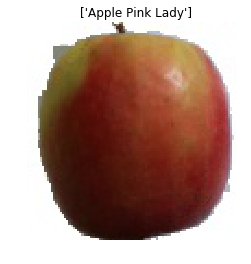

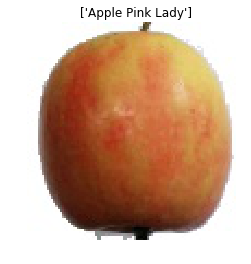

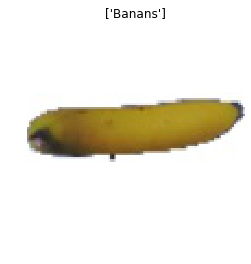

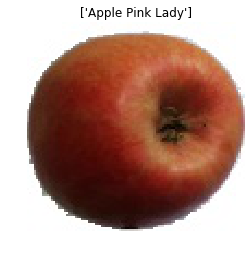

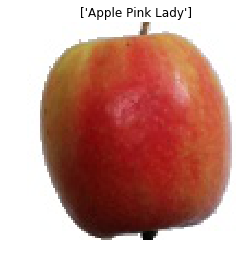

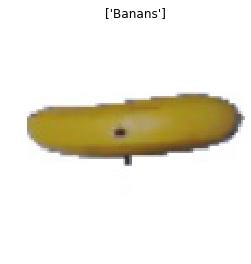

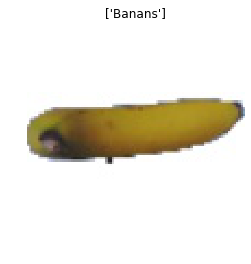

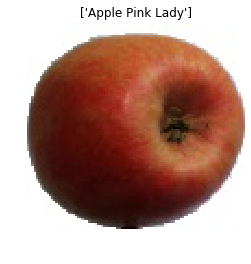

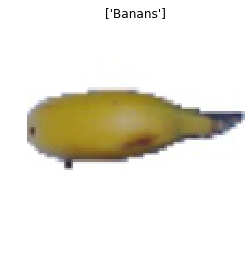

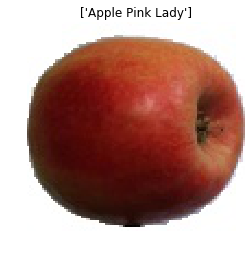

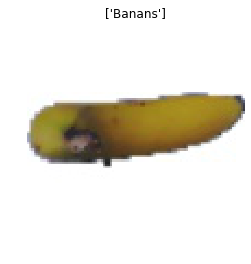

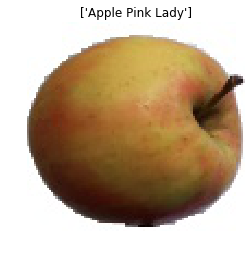

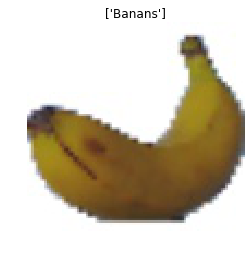

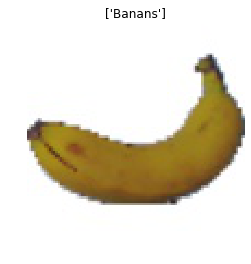

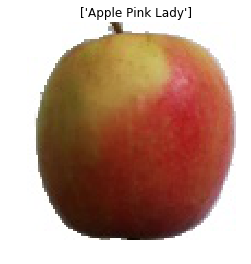

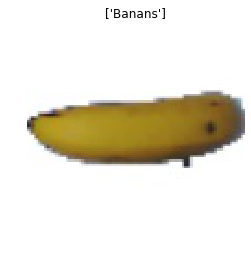

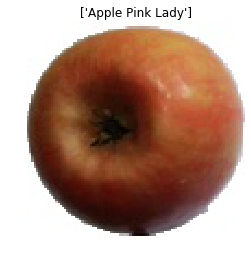

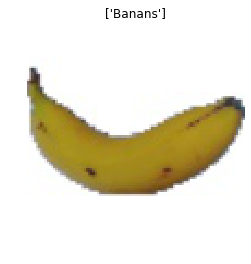

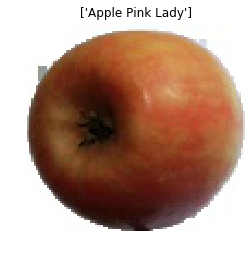

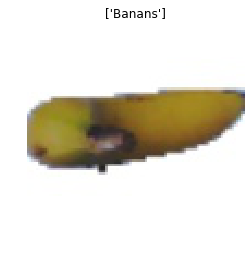

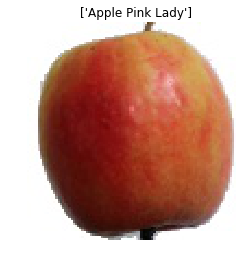

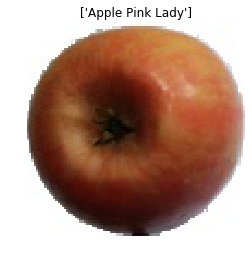

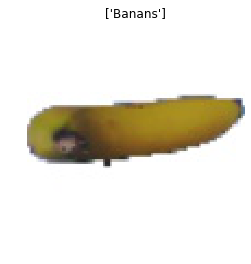

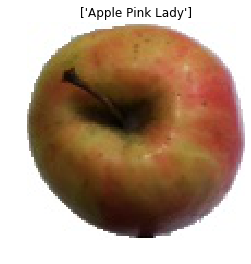

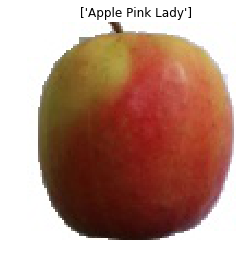

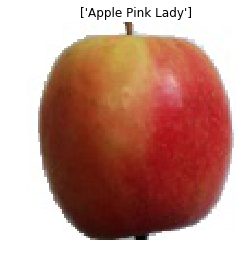

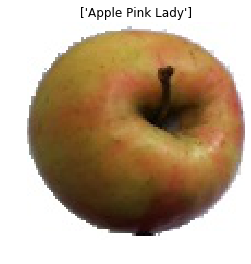

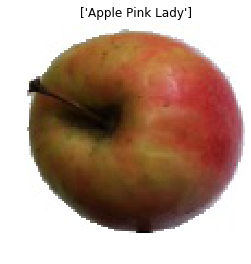

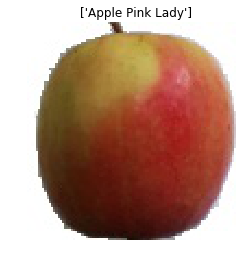

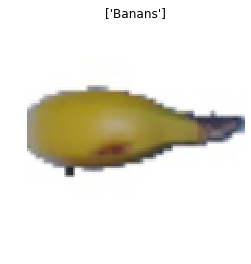

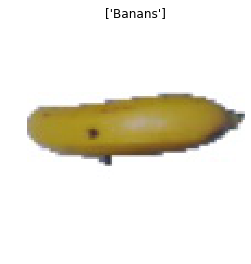

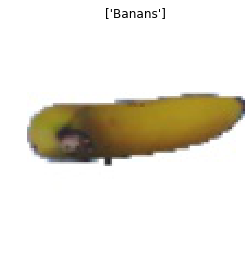

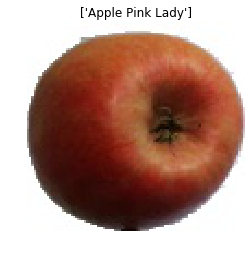

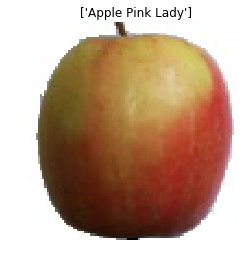

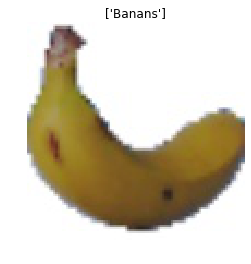

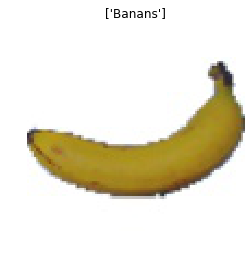

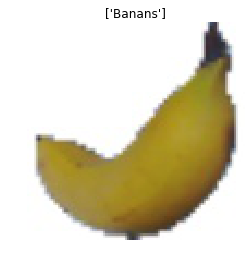

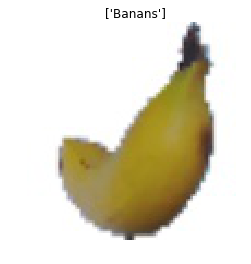

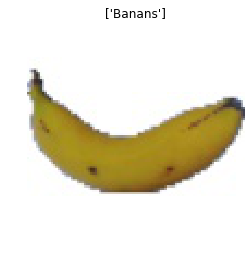

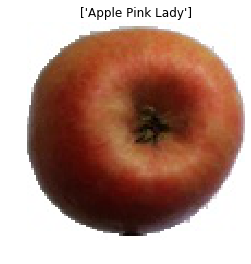

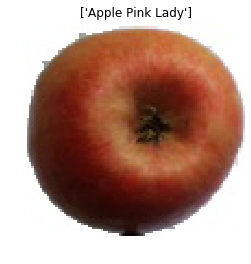

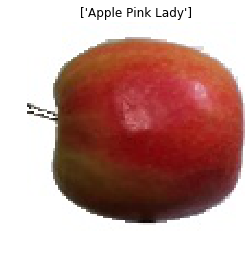

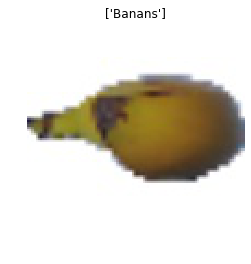

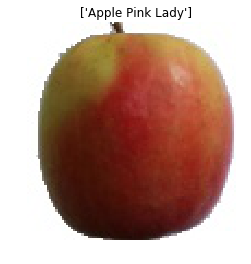

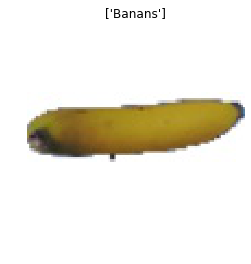

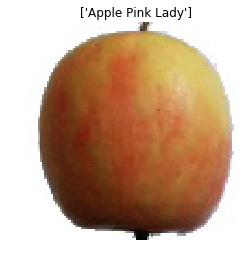

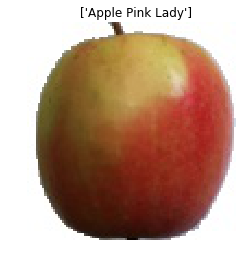

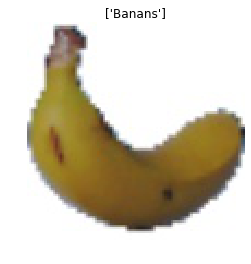

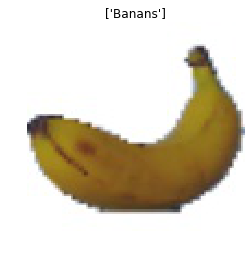

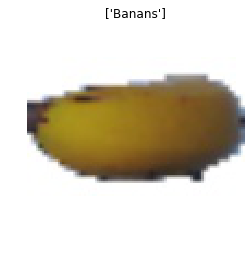

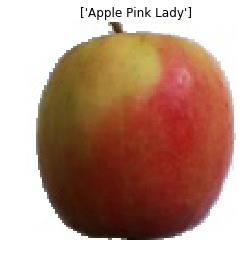

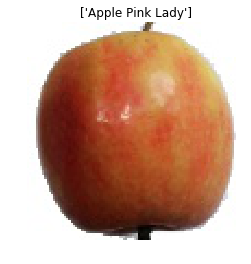

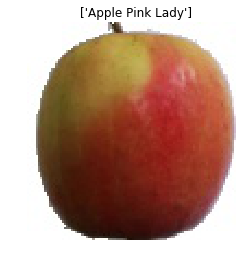

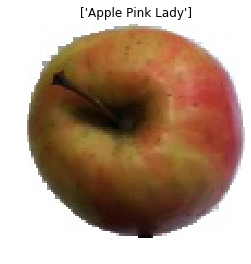

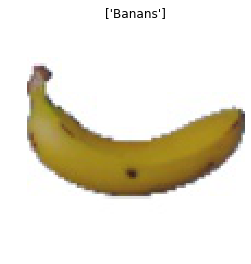

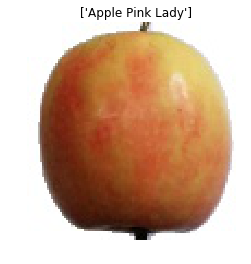

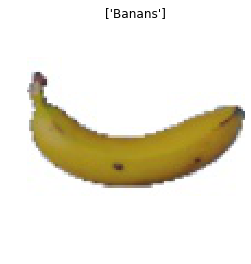

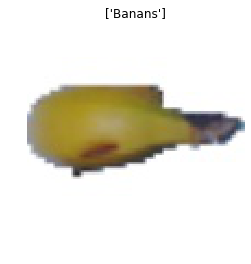

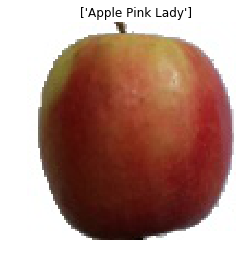

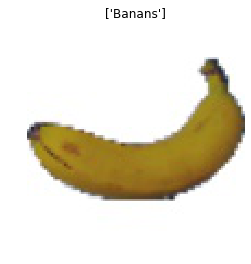

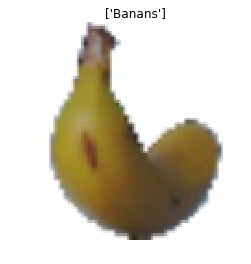

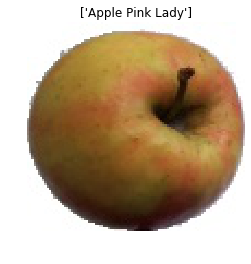

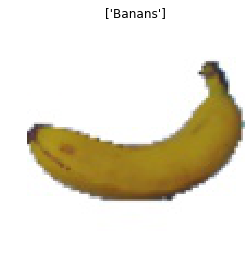

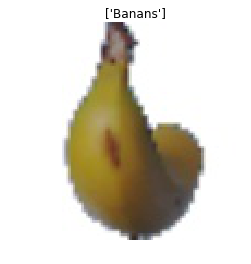

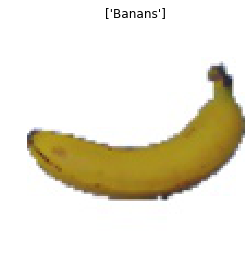

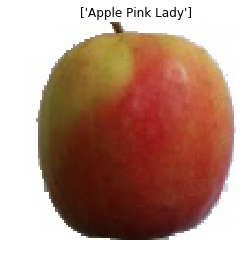

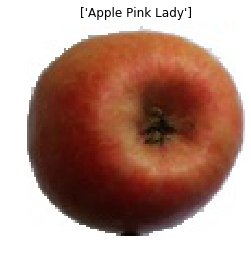

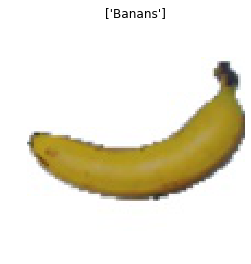

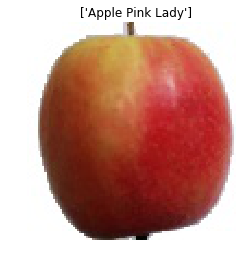

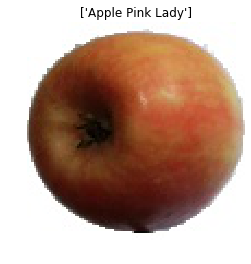

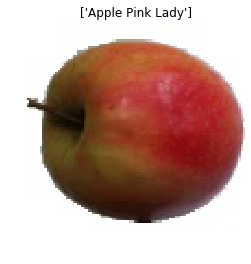

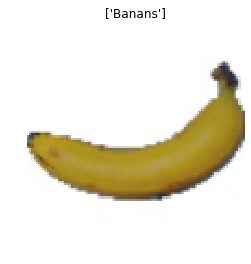

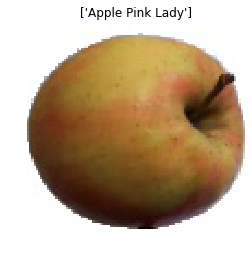

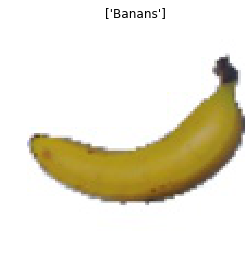

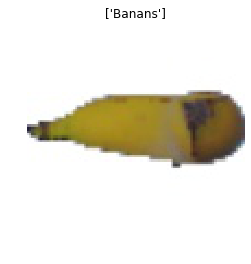

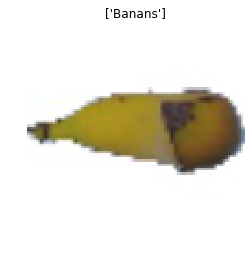

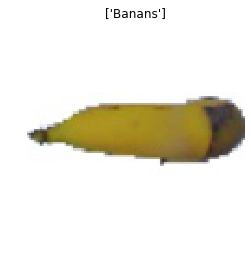

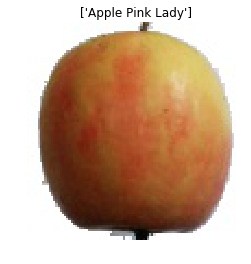

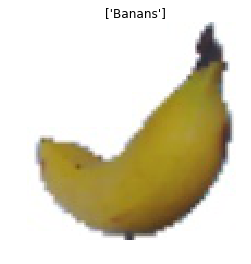

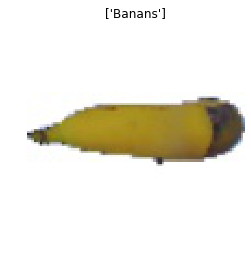

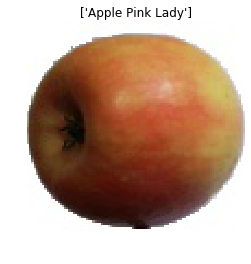

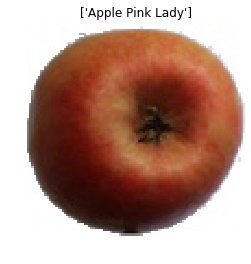

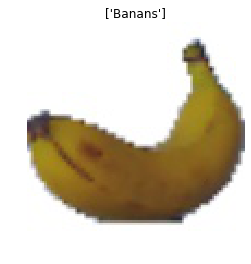

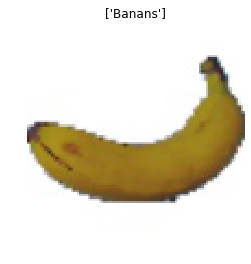

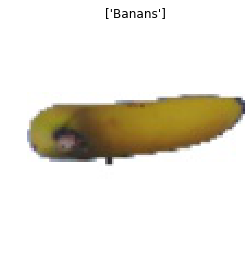

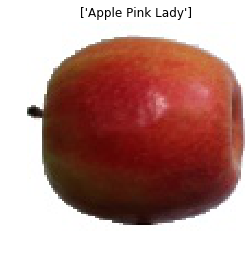

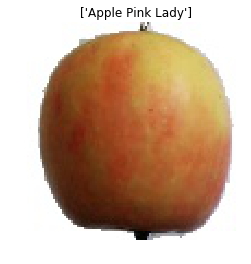

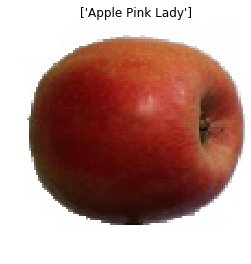

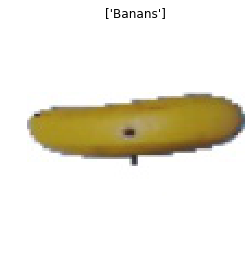

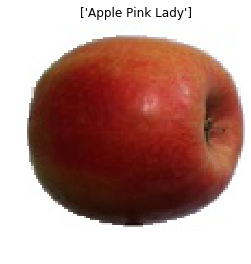

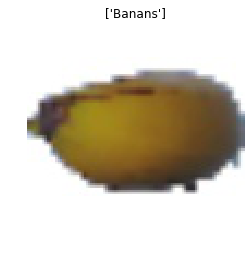

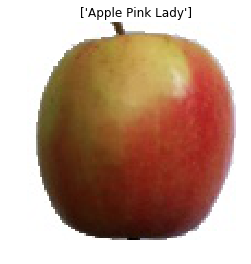

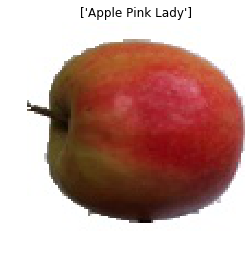

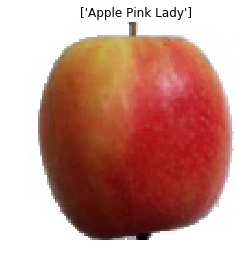

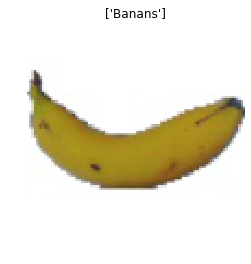

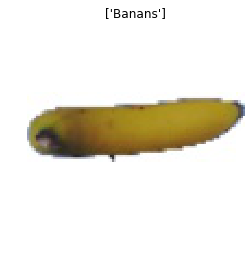

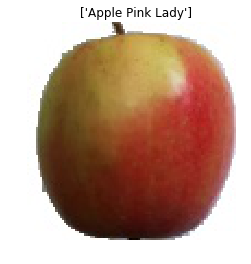

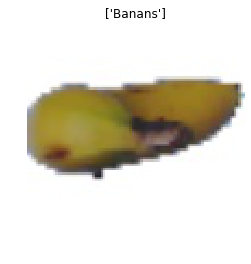

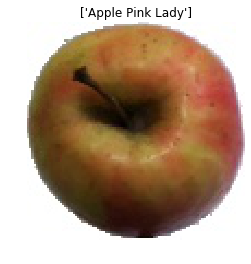

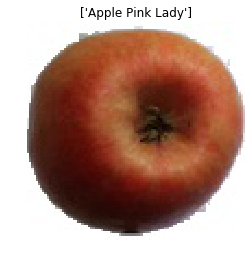

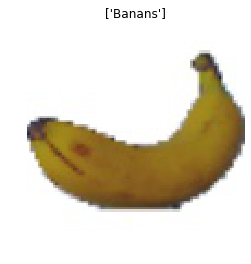

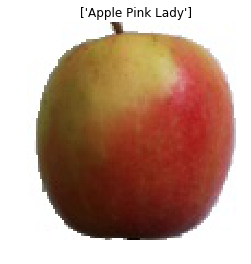

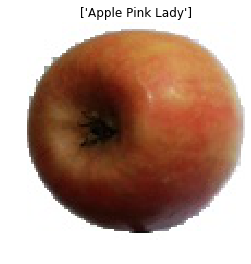

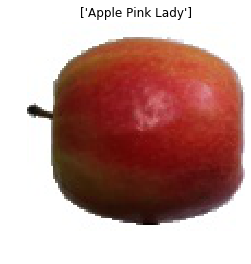

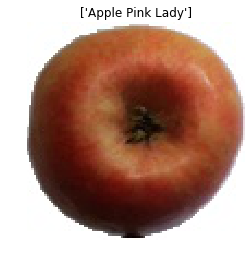

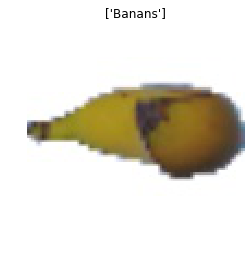

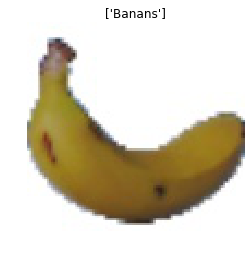

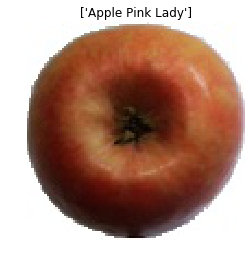

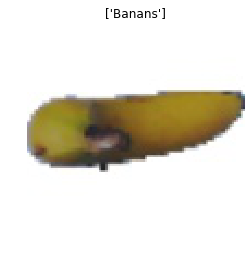

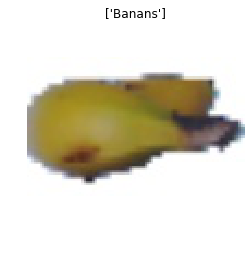

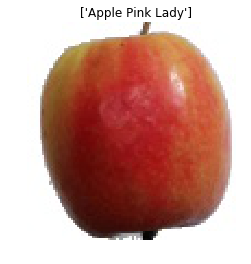

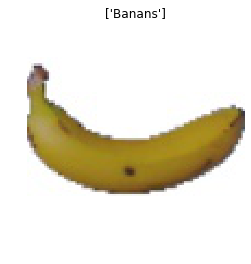

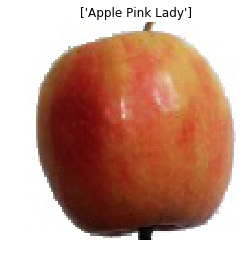

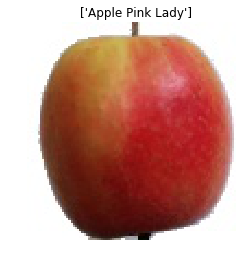

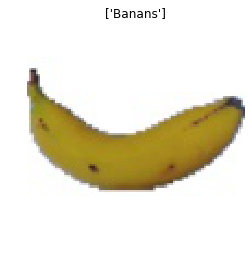

In [9]:
for i in range(0,len(X_test)):
    title = clf.predict(X_test[i].reshape(1, -1))
    restored = X_test[i].reshape(100, 100, 3)
    plt.imshow(restored)
    plt.axis('off')
    plt.title(title)
    plt.show()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':


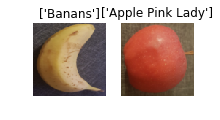

In [10]:
img = imageio.imread("fruits-360/real/banana.jpg")
a = imresize(img, (100, 100))
title = clf.predict(a.reshape(1, -1))

plt.subplot(2, 4, 1)
plt.imshow(a)
plt.axis('off')
plt.title(title)


img = imageio.imread("fruits-360/real/apple.jpg")
a = imresize(img, (100, 100))
title = clf.predict(a.reshape(1, -1))

plt.subplot(2, 4, 2)
plt.imshow(a)
plt.axis('off')
plt.title(title)

plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


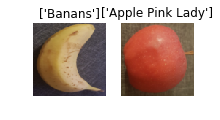

In [16]:
def detect_fruit(path, plot_index):
    img = imageio.imread(path)
    a = imresize(img, (100, 100))
    title = clf.predict(a.reshape(1, -1))

    plt.subplot(2, 4, plot_index)
    plt.imshow(a)
    plt.axis('off')
    plt.title(title)

detect_fruit("fruits-360/real/banana.jpg", 1)
detect_fruit("fruits-360/real/apple.jpg", 2)



plt.show()
